# Body Fat measurements in adults

## 1 Motivation
    1.1 Current bodyfat measurement methods include the expensive and cumbersome methods like DEXAscan, CT scan or hydrostatic weighing-underwater measurement. While they are quite accurate, they are not conducive for a large scale trial. 
    
    E.g. if there is a scientific study on the impact of certain drug or diet on the body fat percentage of humans, using the above methods are impractical.
    
    1.2 There have been numerous attempts at devicing easier and cheaper methods. One such is based on BMI. However, BMI's accurancy is arguable as heavier but muscular people with low body fat may also be categorized as having high body fat percentage.

## 2 Aim of this notebook
    2.1 In this project I will try to make a mathematical model to measure the bidyfat percentages of both males and females using the bodypart measurements at the joint and in-between the joints.
    
    2.2 The intuition is that joints have negligible room for muscle mass and hence should act as a differentiator between two individuals having similar bodyparts measurements elsewhere.
    
    2.3 Consider two individuals who have same height, weight, waist, chest, hips, thighs etc measurements. It is likely that the individual carrying leaner mass will have smaller joint measurements. Of course there might be cases where an individual will have a bigger bone structure but we expect the bone structure is likely to be captured in height.
    
    2.4 In fact a good experiment would be to test whether height alone is a good predictor of bone-only weight of an individual

## 3 Dataset
    3.1 Two datasets will be used for this exercise. One for male subgroup and the other for female subgroup. The two data sets have been used independently in the past. In this exercise I will try to develop a single model for both the subgroups
    
    3.2 The key idea is that males and females are predisposed to store bodyfat at different locations. Hence we might see some diferent patterns in the two set which might warrant the use of a gender interaction term while modelling

### 4.1 Importing a few libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

### 4.2 Importing the male dataset

In [87]:
# base_pathMale = "/Volumes/GoogleDrive/My Drive/6414 Project/Datasets"
filenameMale = "MaleDataset.txt"
# path_to_fileMale = os.path.join(base_pathMale, filenameMale)
dfMale= pd.read_csv(filenameMale,delimiter=r'\s+',header=None, dtype=str)

#### 4.2.1 Checking if the import was successful

In [88]:
dfMale.head()

0     1     2       3   4       5      6     7      8     9      10    11  \
0  1  12.6  12.3  1.0708  23  154.25  67.75  23.7  134.9  36.2   93.1  85.2   
1  2   6.9   6.1  1.0853  22  173.25  72.25  23.4  161.3  38.5   93.6    83   
2  3  24.6  25.3  1.0414  22     154  66.25  24.7    116    34   95.8  87.9   
3  4  10.9  10.4  1.0751  26  184.75  72.25  24.9  164.7  37.4  101.8  86.4   
4  5  27.8  28.7   1.034  24  184.25  71.25  25.6  133.1  34.4   97.3   100   

      12    13    14    15    16    17     18  
0   94.5    59  37.3  21.9    32  27.4  17.1\  
1   98.7  58.7  37.3  23.4  30.5  28.9  18.2\  
2   99.2  59.6  38.9    24  28.8  25.2  16.6\  
3  101.2  60.1  37.3  22.8  32.4  29.4  18.2\  
4  101.9  63.2  42.2    24  32.2  27.7  17.7\

In [4]:
dfMale.shape

(253, 19)

### 4.3 Cleaning the Male dataset

#### 4.3.1 Checking for any missing data or Nan

In [5]:
dfMale.isnull().values.any()

True

#### 4.3.2 Checking How many are missing

In [6]:
dfMale.isnull().sum()

0     0
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
dtype: int64

#### 4.3.3 There are 18 feature columns. Looks like there might a row which has missing value

In [7]:
dfMale[dfMale.notnull()]

0     1     2       3    4       5      6     7      8     9      10  \
0      1  12.6  12.3  1.0708   23  154.25  67.75  23.7  134.9  36.2   93.1   
1      2   6.9   6.1  1.0853   22  173.25  72.25  23.4  161.3  38.5   93.6   
2      3  24.6  25.3  1.0414   22     154  66.25  24.7    116    34   95.8   
3      4  10.9  10.4  1.0751   26  184.75  72.25  24.9  164.7  37.4  101.8   
4      5  27.8  28.7   1.034   24  184.25  71.25  25.6  133.1  34.4   97.3   
..   ...   ...   ...     ...  ...     ...    ...   ...    ...   ...    ...   
248  249  32.3  33.6  1.0236   72     201  69.75  29.1  136.1  40.9  108.5   
249  250  28.3  29.3  1.0328   72  186.75     66  30.2  133.9  38.9  111.1   
250  251  25.3    26  1.0399   72  190.75   70.5    27  142.6  38.9  108.3   
251  252  30.7  31.9  1.0271   74   207.5     70  29.8  143.7  40.8  112.4   
252    }   NaN   NaN     NaN  NaN     NaN    NaN   NaN    NaN   NaN    NaN   

        11     12    13    14    15    16    17     18  
0     85.2   94.5    59  37.3  21.9    32  27.4  17.1\  
1       83   98.7  58.7  37.3  23.4  30.5  28.9  18.2\  
2     87.9   99.2  59.6  38.9    24  28.8  25.2  16.6\  
3     86.4  101.2  60.1  37.3  22.8  32.4  29.4  18.2\  
4      100  101.9  63.2  42.2    24  32.2  27.7  17.7\  
..     ...    ...   ...   ...   ...   ...   ...    ...  
248    105  104.5  59.6  40.8  23.2  35.2  28.6  20.1\  
249  111.5  101.7  60.3  37.3  21.5  31.3  27.2    18\  
250  101.3   97.8    56  41.6  22.7  30.5  29.4  19.8\  
251  108.5  107.1  59.3  42.2  24.6  33.7    30  20.9\  
252    NaN    NaN   NaN   NaN   NaN   NaN   NaN    NaN  

[253 rows x 19 columns]

#### 4.3.4 Some more cleaning
    The last row looks like the problematic one. Let us drop that as it contains no values
    Also the first colun in redundant. Let us drop that as well
    Finally it seems like column 18 has a '\' which needs to be dropped.
    This is also a hint that all the data may not be floats. We will check that convert if needed

In [8]:
dfMale.drop(dfMale.tail(1).index,inplace=True)
dfMale.drop(columns=[0])

1     2       3   4       5      6     7      8     9      10     11  \
0    12.6  12.3  1.0708  23  154.25  67.75  23.7  134.9  36.2   93.1   85.2   
1     6.9   6.1  1.0853  22  173.25  72.25  23.4  161.3  38.5   93.6     83   
2    24.6  25.3  1.0414  22     154  66.25  24.7    116    34   95.8   87.9   
3    10.9  10.4  1.0751  26  184.75  72.25  24.9  164.7  37.4  101.8   86.4   
4    27.8  28.7   1.034  24  184.25  71.25  25.6  133.1  34.4   97.3    100   
..    ...   ...     ...  ..     ...    ...   ...    ...   ...    ...    ...   
247  11.5    11  1.0736  70  134.25     67  21.1  118.9  34.9   89.2   83.6   
248  32.3  33.6  1.0236  72     201  69.75  29.1  136.1  40.9  108.5    105   
249  28.3  29.3  1.0328  72  186.75     66  30.2  133.9  38.9  111.1  111.5   
250  25.3    26  1.0399  72  190.75   70.5    27  142.6  38.9  108.3  101.3   
251  30.7  31.9  1.0271  74   207.5     70  29.8  143.7  40.8  112.4  108.5   

        12    13    14    15    16    17     18  
0     94.5    59  37.3  21.9    32  27.4  17.1\  
1     98.7  58.7  37.3  23.4  30.5  28.9  18.2\  
2     99.2  59.6  38.9    24  28.8  25.2  16.6\  
3    101.2  60.1  37.3  22.8  32.4  29.4  18.2\  
4    101.9  63.2  42.2    24  32.2  27.7  17.7\  
..     ...   ...   ...   ...   ...   ...    ...  
247   88.8  49.6  34.8  21.5  25.6  25.7  18.5\  
248  104.5  59.6  40.8  23.2  35.2  28.6  20.1\  
249  101.7  60.3  37.3  21.5  31.3  27.2    18\  
250   97.8    56  41.6  22.7  30.5  29.4  19.8\  
251  107.1  59.3  42.2  24.6  33.7    30  20.9\  

[252 rows x 18 columns]

#### 4.3.5 At this point let us use the help of the documentation provided and name the columns

In [9]:
col_name=['Axis','Br Fat','Siri Fat','Density','Age','Weight','Height','BMI','Fat Free Wt','Neck','Chest','Waist','Hip','Thigh','Knee','Ankle','Bicep','Forearm','Wrist']
dfMale.set_axis(col_name,axis=1,inplace=True)
dfMale.drop(columns=['Axis'],inplace=True)
dfMale.head()

Br Fat Siri Fat Density Age  Weight Height   BMI Fat Free Wt  Neck  Chest  \
0   12.6     12.3  1.0708  23  154.25  67.75  23.7       134.9  36.2   93.1   
1    6.9      6.1  1.0853  22  173.25  72.25  23.4       161.3  38.5   93.6   
2   24.6     25.3  1.0414  22     154  66.25  24.7         116    34   95.8   
3   10.9     10.4  1.0751  26  184.75  72.25  24.9       164.7  37.4  101.8   
4   27.8     28.7   1.034  24  184.25  71.25  25.6       133.1  34.4   97.3   

  Waist    Hip Thigh  Knee Ankle Bicep Forearm  Wrist  
0  85.2   94.5    59  37.3  21.9    32    27.4  17.1\  
1    83   98.7  58.7  37.3  23.4  30.5    28.9  18.2\  
2  87.9   99.2  59.6  38.9    24  28.8    25.2  16.6\  
3  86.4  101.2  60.1  37.3  22.8  32.4    29.4  18.2\  
4   100  101.9  63.2  42.2    24  32.2    27.7  17.7\

##### Let us remove the ''\\'' from the last column now

In [10]:
dfMale['Wrist']=dfMale['Wrist'].apply(lambda x: re.findall(r'[\d.]+',x)[0])

dfMale.head()

Br Fat Siri Fat Density Age  Weight Height   BMI Fat Free Wt  Neck  Chest  \
0   12.6     12.3  1.0708  23  154.25  67.75  23.7       134.9  36.2   93.1   
1    6.9      6.1  1.0853  22  173.25  72.25  23.4       161.3  38.5   93.6   
2   24.6     25.3  1.0414  22     154  66.25  24.7         116    34   95.8   
3   10.9     10.4  1.0751  26  184.75  72.25  24.9       164.7  37.4  101.8   
4   27.8     28.7   1.034  24  184.25  71.25  25.6       133.1  34.4   97.3   

  Waist    Hip Thigh  Knee Ankle Bicep Forearm Wrist  
0  85.2   94.5    59  37.3  21.9    32    27.4  17.1  
1    83   98.7  58.7  37.3  23.4  30.5    28.9  18.2  
2  87.9   99.2  59.6  38.9    24  28.8    25.2  16.6  
3  86.4  101.2  60.1  37.3  22.8  32.4    29.4  18.2  
4   100  101.9  63.2  42.2    24  32.2    27.7  17.7

##### As a final step we check the data type and convert everything to float

In [11]:
dfMale.dtypes

Br Fat         object
Siri Fat       object
Density        object
Age            object
Weight         object
Height         object
BMI            object
Fat Free Wt    object
Neck           object
Chest          object
Waist          object
Hip            object
Thigh          object
Knee           object
Ankle          object
Bicep          object
Forearm        object
Wrist          object
dtype: object

In [12]:
cols = dfMale.select_dtypes(exclude=['float']).columns
dfMale[cols] = dfMale[cols].apply(pd.to_numeric, downcast='float', errors='coerce')
dfMale.dtypes

Br Fat         float32
Siri Fat       float32
Density        float32
Age            float32
Weight         float32
Height         float32
BMI            float32
Fat Free Wt    float32
Neck           float32
Chest          float32
Waist          float32
Hip            float32
Thigh          float32
Knee           float32
Ankle          float32
Bicep          float32
Forearm        float32
Wrist          float32
dtype: object

### ----Now we are ready to use the male dataset----

### 4.5 Importing the female dataset

In [89]:
# base_pathFemale = "/Volumes/GoogleDrive/My Drive/6414 Project/Datasets"
filenameFemale = "FemaleDataset.txt"
# path_to_fileFemale = os.path.join(base_pathFemale, filenameFemale)
dfFemale= pd.read_csv(filenameFemale,delimiter=r'\s+', dtype=str)

#### 4.5.1 Checking if the import was successful

In [90]:
dfFemale.head()

Obs    Fat   Weight   Height     BMI Age  Neck Chest  Calf Biceps  Hips  \
0   1  23.07  49.4424  1.61290  19.006  22  28.8  76.1  32.4   25.0  90.2   
1   2  29.50  60.7824  1.57480  24.509  22  31.2  87.3  33.2   26.8  94.0   
2   3  26.99  63.0504  1.61798  24.085  21  30.8  83.7  32.5   27.8  94.0   
3   4  20.25  53.0712  1.68148  18.771  20  30.0  78.0  34.2   23.8  90.5   
4   5  19.95  59.4216  1.73228  19.802  20  32.5  84.2  35.2   24.2  93.2   

  Waist Forearm PThigh MThigh DThigh Wrist  Knee Elbow Ankle  
0  62.8    21.0   52.5   49.2   37.0  15.0  33.0  22.0  19.7  
1  68.0    23.2   58.5   50.0   39.0  15.8  34.6  23.0  22.0  
2  71.0    21.8   55.5   51.0   38.0  14.4  35.0  24.3  20.1  
3  63.5    21.5   52.5   48.0   37.0  14.5  35.0  22.6  20.0  
4  65.0    21.0   55.5   50.0   39.5  14.8  33.0  24.4  21.0

###### 4.5.6 Doing some datacleaning like earlier

In [15]:
dfFemale.drop(['Obs'],axis=1,inplace=True)
dfFemale.dtypes

Fat        object
Weight     object
Height     object
BMI        object
Age        object
Neck       object
Chest      object
Calf       object
Biceps     object
Hips       object
Waist      object
Forearm    object
PThigh     object
MThigh     object
DThigh     object
Wrist      object
Knee       object
Elbow      object
Ankle      object
dtype: object

In [16]:
cols = dfFemale.select_dtypes(exclude=['float']).columns
dfFemale[cols] = dfFemale[cols].apply(pd.to_numeric, downcast='float', errors='coerce')
dfFemale.dtypes

Fat        float32
Weight     float32
Height     float32
BMI        float32
Age        float32
Neck       float32
Chest      float32
Calf       float32
Biceps     float32
Hips       float32
Waist      float32
Forearm    float32
PThigh     float32
MThigh     float32
DThigh     float32
Wrist      float32
Knee       float32
Elbow      float32
Ankle      float32
dtype: object

### 4.6 At this point let us pause and look what we have and what we need 

In [17]:
dfMale

Br Fat   Siri Fat  Density   Age  Weight  Height        BMI  \
0    12.600000  12.300000   1.0708  23.0  154.25   67.75  23.700001   
1     6.900000   6.100000   1.0853  22.0  173.25   72.25  23.400000   
2    24.600000  25.299999   1.0414  22.0  154.00   66.25  24.700001   
3    10.900000  10.400000   1.0751  26.0  184.75   72.25  24.900000   
4    27.799999  28.700001   1.0340  24.0  184.25   71.25  25.600000   
..         ...        ...      ...   ...     ...     ...        ...   
247  11.500000  11.000000   1.0736  70.0  134.25   67.00  21.100000   
248  32.299999  33.599998   1.0236  72.0  201.00   69.75  29.100000   
249  28.299999  29.299999   1.0328  72.0  186.75   66.00  30.200001   
250  25.299999  26.000000   1.0399  72.0  190.75   70.50  27.000000   
251  30.700001  31.900000   1.0271  74.0  207.50   70.00  29.799999   

     Fat Free Wt       Neck       Chest       Waist         Hip      Thigh  \
0     134.899994  36.200001   93.099998   85.199997   94.500000  59.000000   
1     161.300003  38.500000   93.599998   83.000000   98.699997  58.700001   
2     116.000000  34.000000   95.800003   87.900002   99.199997  59.599998   
3     164.699997  37.400002  101.800003   86.400002  101.199997  60.099998   
4     133.100006  34.400002   97.300003  100.000000  101.900002  63.200001   
..           ...        ...         ...         ...         ...        ...   
247   118.900002  34.900002   89.199997   83.599998   88.800003  49.599998   
248   136.100006  40.900002  108.500000  105.000000  104.500000  59.599998   
249   133.899994  38.900002  111.099998  111.500000  101.699997  60.299999   
250   142.600006  38.900002  108.300003  101.300003   97.800003  56.000000   
251   143.699997  40.799999  112.400002  108.500000  107.099998  59.299999   

          Knee      Ankle      Bicep    Forearm      Wrist  
0    37.299999  21.900000  32.000000  27.400000  17.100000  
1    37.299999  23.400000  30.500000  28.900000  18.200001  
2    38.900002  24.000000  28.799999  25.200001  16.600000  
3    37.299999  22.799999  32.400002  29.400000  18.200001  
4    42.200001  24.000000  32.200001  27.700001  17.700001  
..         ...        ...        ...        ...        ...  
247  34.799999  21.500000  25.600000  25.700001  18.500000  
248  40.799999  23.200001  35.200001  28.600000  20.100000  
249  37.299999  21.500000  31.299999  27.200001  18.000000  
250  41.599998  22.700001  30.500000  29.400000  19.799999  
251  42.200001  24.600000  33.700001  30.000000  20.900000  

[252 rows x 18 columns]

In [18]:
dfFemale

Fat     Weight   Height        BMI   Age       Neck      Chest  \
0    23.070000  49.442402  1.61290  19.006001  22.0  28.799999  76.099998   
1    29.500000  60.782398  1.57480  24.509001  22.0  31.200001  87.300003   
2    26.990000  63.050400  1.61798  24.084999  21.0  30.799999  83.699997   
3    20.250000  53.071201  1.68148  18.771000  20.0  30.000000  78.000000   
4    19.950001  59.421600  1.73228  19.802000  20.0  32.500000  84.199997   
..         ...        ...      ...        ...   ...        ...        ...   
179  30.400000  59.875198  1.56210  24.537001  23.0  31.299999  89.000000   
180   7.470000  48.535198  1.57480  19.570999  21.0  29.500000  79.000000   
181  11.980000  51.710400  1.57480  20.851000  20.0  31.500000  81.500000   
182  11.240000  50.803200  1.65100  18.638000  22.0  30.500000  85.000000   
183  17.490000  47.627998  1.60020  18.600000  24.0  26.000000  79.300003   

          Calf     Biceps       Hips      Waist    Forearm  PThigh     MThigh  \
0    32.400002  25.000000  90.199997  62.799999  21.000000    52.5  49.200001   
1    33.200001  26.799999  94.000000  68.000000  23.200001    58.5  50.000000   
2    32.500000  27.799999  94.000000  71.000000  21.799999    55.5  51.000000   
3    34.200001  23.799999  90.500000  63.500000  21.500000    52.5  48.000000   
4    35.200001  24.200001  93.199997  65.000000  21.000000    55.5  50.000000   
..         ...        ...        ...        ...        ...     ...        ...   
179  36.000000  28.000000  98.500000  71.000000  24.500000    62.5  56.000000   
180  34.000000  25.000000  89.000000  62.500000  22.000000    52.5  49.000000   
181  32.500000  27.500000  90.000000  61.500000  22.500000    53.0  49.500000   
182  32.000000  24.000000  88.000000  64.000000  21.500000    51.0  45.000000   
183  32.599998  24.000000  86.599998  63.000000  21.500000    53.0  46.000000   

     DThigh      Wrist       Knee      Elbow      Ankle  
0      37.0  15.000000  33.000000  22.000000  19.700001  
1      39.0  15.800000  34.599998  23.000000  22.000000  
2      38.0  14.400000  35.000000  24.299999  20.100000  
3      37.0  14.500000  35.000000  22.600000  20.000000  
4      39.5  14.800000  33.000000  24.400000  21.000000  
..      ...        ...        ...        ...        ...  
179    42.0  16.299999  36.200001  24.000000  21.000000  
180    37.0  15.500000  33.000000  22.000000  20.000000  
181    36.0  15.000000  32.000000  22.500000  19.500000  
182    33.0  15.000000  32.000000  22.000000  19.500000  
183    35.0  14.000000  33.500000  21.000000  19.000000  

[184 rows x 19 columns]

#### 4.6.1 The Male dataset has 252 rows and the female one has 184 rows
#### 4.6.2 The male dataset has 18 atributes and the female one has 19 attributes
#### 4.6.3 From the descripotion of the dataset by the two independent data collecotors, it is clear that Siri Fat in male dataset is equivalent to the Fat in female dataset
#### 4.6.4 Siri Fat is derived from the density via the Siri's equation. Fat Free Wt can be obtained from other parameters. Hence we will drop it
#### 4.6.5 In addition, women dataset have 3 different measures of Thigh. As per the usual practice Thigh measurement is usually done at the Pthigh. Hence we will drop the MThigh and DThigh as well
#### 4.6.6 Let us do these changes and see what we are left with

In [19]:
dfMale.drop(['Br Fat', 'Density','Fat Free Wt'],axis=1,inplace=True)
dfMale.rename(columns={'Siri Fat':'Fat','Hip':'Hips','Bicep':'Biceps'},inplace=True)
dfFemale.drop(['MThigh','DThigh'],axis=1,inplace=True)
dfFemale.rename(columns={'PThigh':'Thigh'},inplace=True)

In [20]:
dfMale

Fat   Age  Weight  Height        BMI       Neck       Chest  \
0    12.300000  23.0  154.25   67.75  23.700001  36.200001   93.099998   
1     6.100000  22.0  173.25   72.25  23.400000  38.500000   93.599998   
2    25.299999  22.0  154.00   66.25  24.700001  34.000000   95.800003   
3    10.400000  26.0  184.75   72.25  24.900000  37.400002  101.800003   
4    28.700001  24.0  184.25   71.25  25.600000  34.400002   97.300003   
..         ...   ...     ...     ...        ...        ...         ...   
247  11.000000  70.0  134.25   67.00  21.100000  34.900002   89.199997   
248  33.599998  72.0  201.00   69.75  29.100000  40.900002  108.500000   
249  29.299999  72.0  186.75   66.00  30.200001  38.900002  111.099998   
250  26.000000  72.0  190.75   70.50  27.000000  38.900002  108.300003   
251  31.900000  74.0  207.50   70.00  29.799999  40.799999  112.400002   

          Waist        Hips      Thigh       Knee      Ankle     Biceps  \
0     85.199997   94.500000  59.000000  37.299999  21.900000  32.000000   
1     83.000000   98.699997  58.700001  37.299999  23.400000  30.500000   
2     87.900002   99.199997  59.599998  38.900002  24.000000  28.799999   
3     86.400002  101.199997  60.099998  37.299999  22.799999  32.400002   
4    100.000000  101.900002  63.200001  42.200001  24.000000  32.200001   
..          ...         ...        ...        ...        ...        ...   
247   83.599998   88.800003  49.599998  34.799999  21.500000  25.600000   
248  105.000000  104.500000  59.599998  40.799999  23.200001  35.200001   
249  111.500000  101.699997  60.299999  37.299999  21.500000  31.299999   
250  101.300003   97.800003  56.000000  41.599998  22.700001  30.500000   
251  108.500000  107.099998  59.299999  42.200001  24.600000  33.700001   

       Forearm      Wrist  
0    27.400000  17.100000  
1    28.900000  18.200001  
2    25.200001  16.600000  
3    29.400000  18.200001  
4    27.700001  17.700001  
..         ...        ...  
247  25.700001  18.500000  
248  28.600000  20.100000  
249  27.200001  18.000000  
250  29.400000  19.799999  
251  30.000000  20.900000  

[252 rows x 15 columns]

In [21]:
dfFemale

Fat     Weight   Height        BMI   Age       Neck      Chest  \
0    23.070000  49.442402  1.61290  19.006001  22.0  28.799999  76.099998   
1    29.500000  60.782398  1.57480  24.509001  22.0  31.200001  87.300003   
2    26.990000  63.050400  1.61798  24.084999  21.0  30.799999  83.699997   
3    20.250000  53.071201  1.68148  18.771000  20.0  30.000000  78.000000   
4    19.950001  59.421600  1.73228  19.802000  20.0  32.500000  84.199997   
..         ...        ...      ...        ...   ...        ...        ...   
179  30.400000  59.875198  1.56210  24.537001  23.0  31.299999  89.000000   
180   7.470000  48.535198  1.57480  19.570999  21.0  29.500000  79.000000   
181  11.980000  51.710400  1.57480  20.851000  20.0  31.500000  81.500000   
182  11.240000  50.803200  1.65100  18.638000  22.0  30.500000  85.000000   
183  17.490000  47.627998  1.60020  18.600000  24.0  26.000000  79.300003   

          Calf     Biceps       Hips      Waist    Forearm  Thigh      Wrist  \
0    32.400002  25.000000  90.199997  62.799999  21.000000   52.5  15.000000   
1    33.200001  26.799999  94.000000  68.000000  23.200001   58.5  15.800000   
2    32.500000  27.799999  94.000000  71.000000  21.799999   55.5  14.400000   
3    34.200001  23.799999  90.500000  63.500000  21.500000   52.5  14.500000   
4    35.200001  24.200001  93.199997  65.000000  21.000000   55.5  14.800000   
..         ...        ...        ...        ...        ...    ...        ...   
179  36.000000  28.000000  98.500000  71.000000  24.500000   62.5  16.299999   
180  34.000000  25.000000  89.000000  62.500000  22.000000   52.5  15.500000   
181  32.500000  27.500000  90.000000  61.500000  22.500000   53.0  15.000000   
182  32.000000  24.000000  88.000000  64.000000  21.500000   51.0  15.000000   
183  32.599998  24.000000  86.599998  63.000000  21.500000   53.0  14.000000   

          Knee      Elbow      Ankle  
0    33.000000  22.000000  19.700001  
1    34.599998  23.000000  22.000000  
2    35.000000  24.299999  20.100000  
3    35.000000  22.600000  20.000000  
4    33.000000  24.400000  21.000000  
..         ...        ...        ...  
179  36.200001  24.000000  21.000000  
180  33.000000  22.000000  20.000000  
181  32.000000  22.500000  19.500000  
182  32.000000  22.000000  19.500000  
183  33.500000  21.000000  19.000000  

[184 rows x 17 columns]

#### 4.6.7 We still see that there are 2 extra columns in the female dataframe. Let us see which they are

In [22]:
dfFemale.columns.difference(dfMale.columns)

Index(['Calf', 'Elbow'], dtype='object')

#### 4.6.8 Calf and elbow are two attributed that are not present in the male dataset. Although we would want as many attrbutes as possible, but since we do not have them for males, let's drop them

In [23]:
dfFemale.drop(dfFemale.columns.difference(dfMale.columns),inplace=True,axis=1)

#### 4.6.9 Seems like we are done with the basic cleaning part. Let us turn our attention to some basic data exploration

## 4.7 Exploratory Data Analysis

### 4.7.1 Exploring the male dataset

#### 4.7.1.1 Boxplots to identify outliers

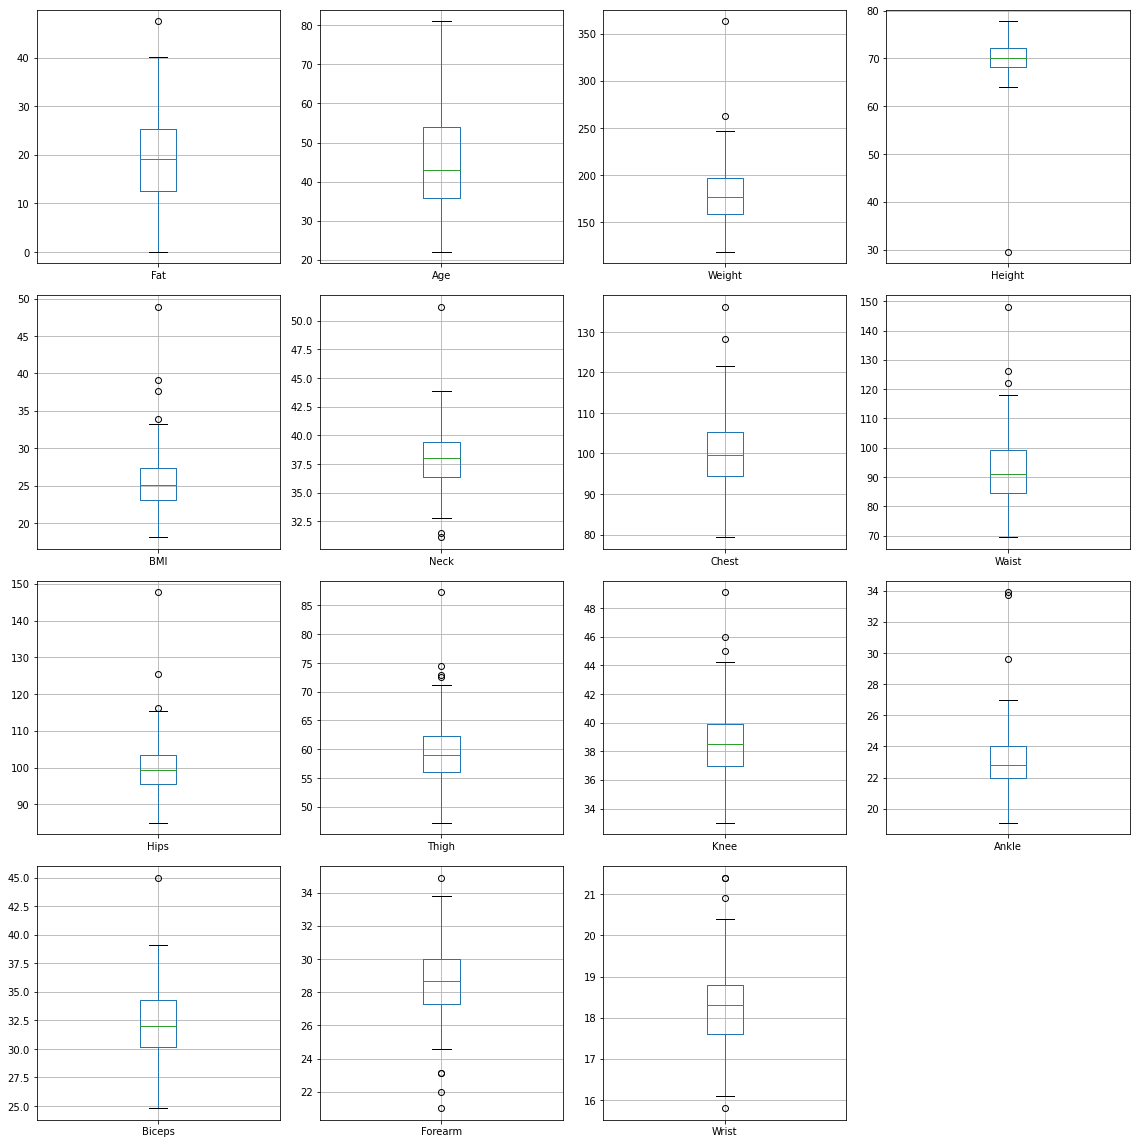

In [24]:
fig, axes = plt.subplots(4,4,figsize=(16,16)) # create figure and axes
for i,e in enumerate((dfMale.columns.values)):
    a=dfMale.boxplot(e,ax=axes.flatten()[i],figsize=(4,4))
plt.tight_layout() 
fig.delaxes(axes[3,3]) # remove empty subplot
plt.show()

#### 4.7.1.2 Seems like someone has no fat (nearly impossible), someone has height less than 50 inches (not impossible but other body dimensions don't suggest there should be such an outlier) and some outliers wrt to other attributes
    Let's explore them one at a time

In [25]:
dfMale.describe()

Fat         Age      Weight      Height         BMI        Neck  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean    19.150795   44.884922  178.924408   70.148811   25.436905   37.992062   
std      8.368742   12.602039   29.389158    3.662856    3.648111    2.430913   
min      0.000000   22.000000  118.500000   29.500000   18.100000   31.100000   
25%     12.475000   35.750000  159.000000   68.250000   23.100000   36.400002   
50%     19.200001   43.000000  176.500000   70.000000   25.050000   38.000000   
75%     25.299999   54.000000  197.000000   72.250000   27.324999   39.425001   
max     47.500000   81.000000  363.149994   77.750000   48.900002   51.200001   

            Chest       Waist        Hips       Thigh        Knee       Ankle  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   100.824181   92.555901   99.904739   59.405945   38.590466   23.102383   
std      8.430475   10.783077    7.164056    5.249952    2.411804    1.694893   
min     79.300003   69.400002   85.000000   47.200001   33.000000   19.100000   
25%     94.350000   84.574999   95.500000   56.000000   36.975000   22.000000   
50%     99.649998   90.950001   99.300003   59.000000   38.500000   22.799999   
75%    105.375002   99.324997  103.525000   62.349999   39.925001   24.000000   
max    136.199997  148.100006  147.699997   87.300003   49.099998   33.900002   

           Biceps     Forearm       Wrist  
count  252.000000  252.000000  252.000000  
mean    32.273415   28.663891   18.229752  
std      3.021273    2.020692    0.933585  
min     24.799999   21.000000   15.800000  
25%     30.200001   27.299999   17.600000  
50%     32.049999   28.700001   18.299999  
75%     34.325000   30.000000   18.799999  
max     45.000000   34.900002   21.400000

In [26]:
dfMale[dfMale['Fat']==0]

Fat   Age  Weight  Height   BMI       Neck      Chest      Waist  Hips  \
181  0.0  40.0   118.5    68.0  18.1  33.799999  79.300003  69.400002  85.0   

         Thigh  Knee      Ankle     Biceps  Forearm  Wrist  
181  47.200001  33.5  20.200001  27.700001     24.6   16.5

In [27]:
dfMale[dfMale['Weight']>250]

Fat   Age      Weight  Height        BMI       Neck       Chest  \
38  35.200001  46.0  363.149994   72.25  48.900002  51.200001  136.199997   
40  34.500000  45.0  262.750000   68.75  39.099998  43.200001  128.300003   

         Waist        Hips      Thigh       Knee  Ankle     Biceps    Forearm  \
38  148.100006  147.699997  87.300003  49.099998   29.6  45.000000  29.000000   
40  126.199997  125.599998  72.500000  39.599998   26.6  36.400002  32.700001   

    Wrist  
38   21.4  
40   21.4

#### 4.7.1.3 While the Fat looks unlikely, the other dimensions seem to be arising from the same individual. The person's other dimensions are also in the lower quartile. Hence we will replace the bodyfat with the lowest in the dataset

In [28]:
dfMale['Fat'][dfMale['Fat']==0]=min(dfMale['Fat'][dfMale['Fat']>0])

#### 4.7.1.4 For the height outlier, let us see if we can backcalculate it from the BMI, since BMI and weight seem inplace

In [29]:
dfMale[dfMale['Height']==min(dfMale['Height'])]

Fat   Age  Weight  Height   BMI       Neck  Chest       Waist  \
41  32.900002  44.0   205.0    29.5  29.9  36.599998  106.0  104.300003   

     Hips      Thigh  Knee      Ankle     Biceps    Forearm  Wrist  
41  115.5  70.599998  42.5  23.700001  33.599998  28.700001   17.4

In [30]:
height=(dfMale['Weight'][dfMale['Height']==min(dfMale['Height'])]/2.2/dfMale['BMI'][dfMale['Height']==min(dfMale['Height'])])**0.5*100/2.54
height

41    69.501839
dtype: float32

##### 4.7.1.3.1 This looks like a correct height. We will impute this in

In [31]:
dfMale['Height'][dfMale['Height']==min(dfMale['Height'])]=height

#### 4.7.2 For a sanity check lets check the data once again but this time plotting a histogram

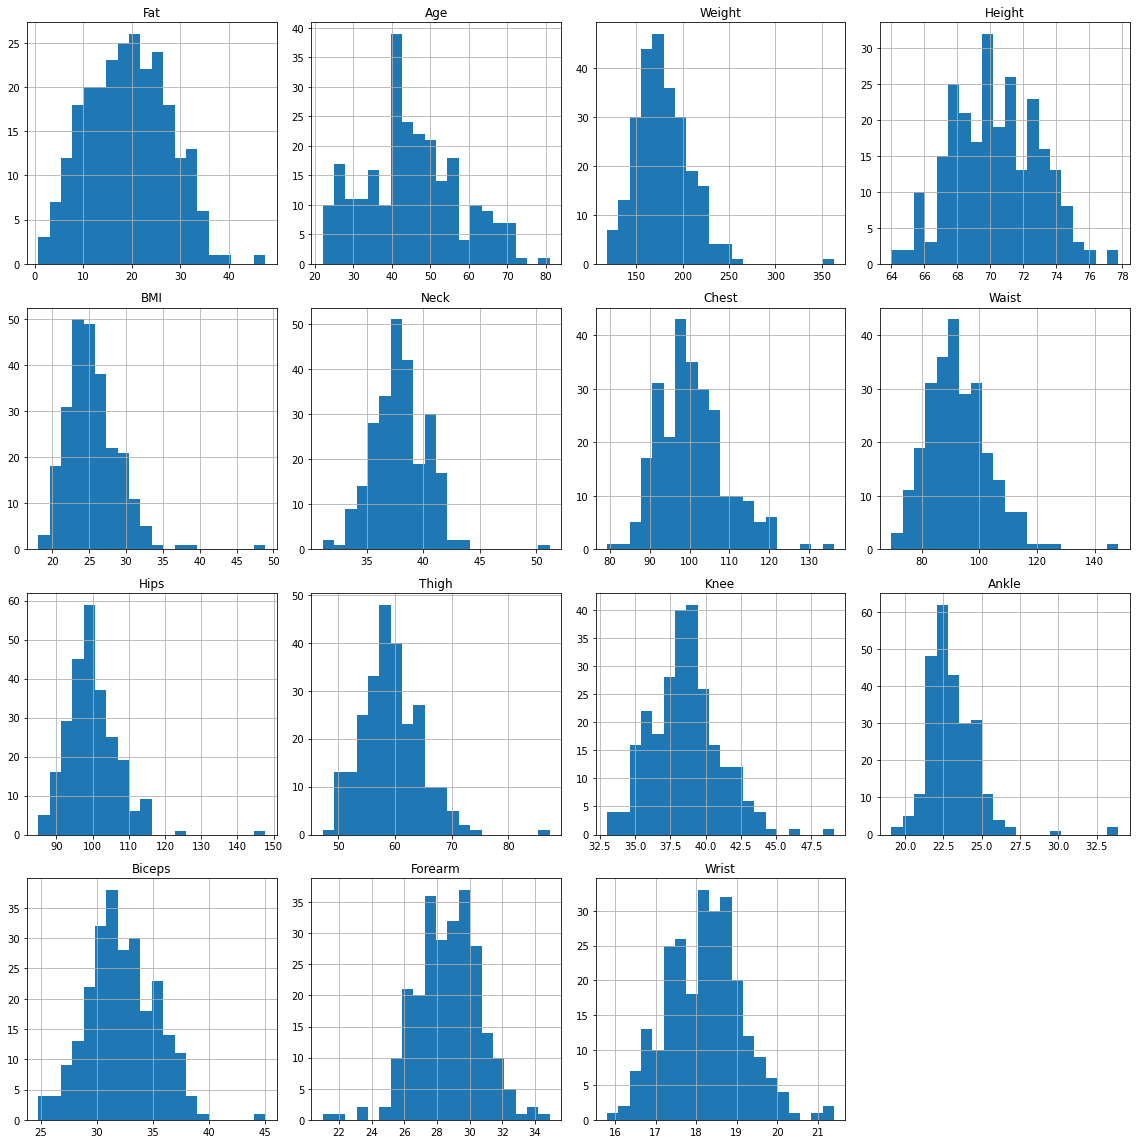

In [32]:
fig, axes = plt.subplots(4,4,figsize=(16,16)) # create figure and axes
for i,e in enumerate((dfMale.columns.values)):
    a=dfMale.hist(e,ax=axes.flatten()[i],figsize=(4,4),bins=20)
plt.tight_layout() 
fig.delaxes(axes[3,3]) # remove empty subplot
plt.show()

### ----Looks like we are all set to use the male dataset----

### 4.7.2 Exploring the female dataset

#### 4.7.2.2 Boxplot to identify outliers

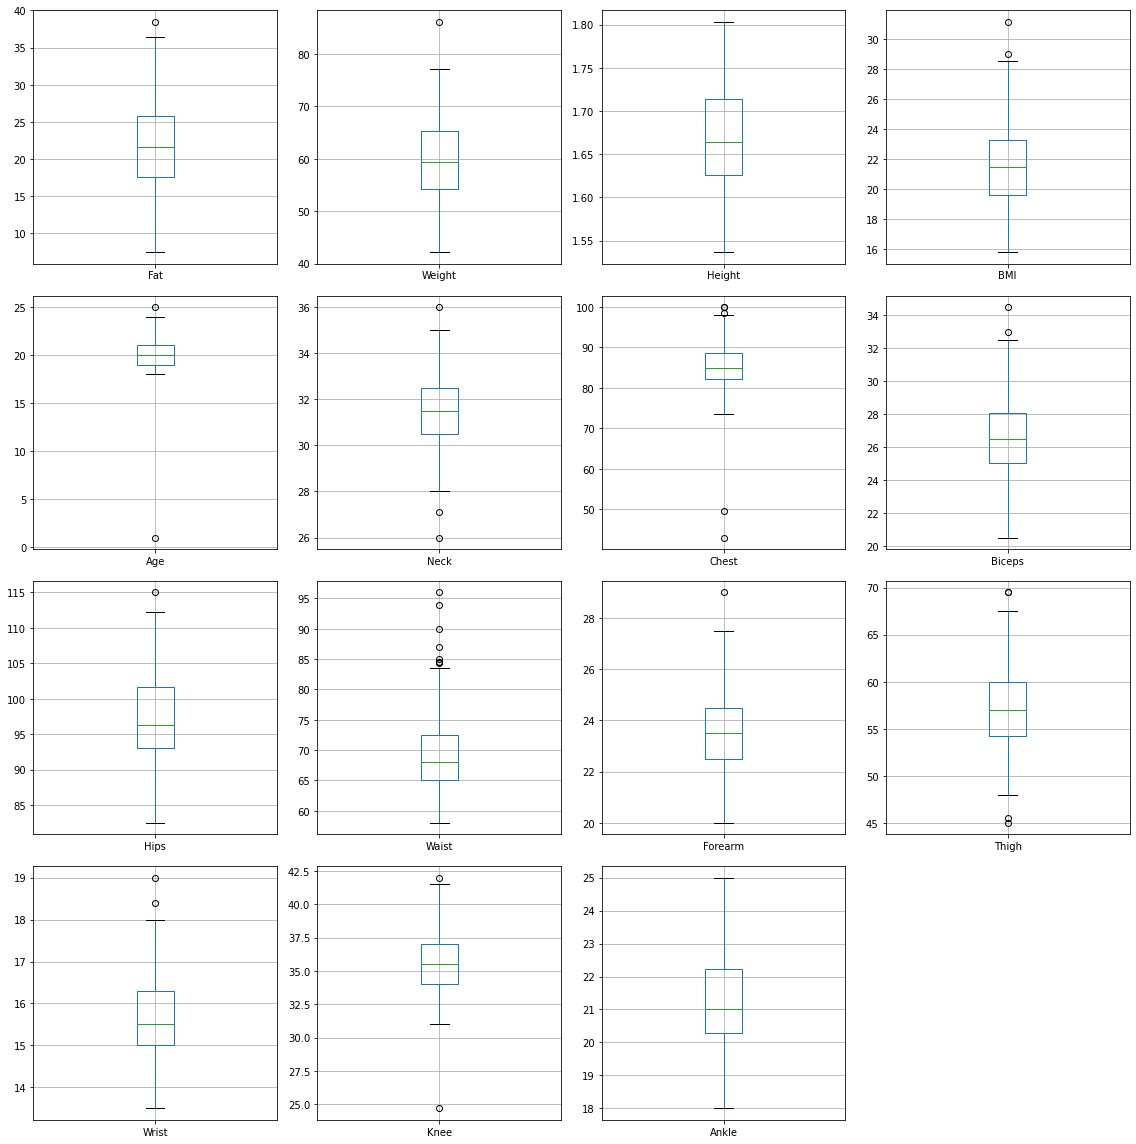

In [33]:
fig, axes = plt.subplots(4,4,figsize=(16,16)) # create figure and axes
for i,e in enumerate((dfFemale.columns.values)):
    a=dfFemale.boxplot(e,ax=axes.flatten()[i],figsize=(4,4))
plt.tight_layout() 
fig.delaxes(axes[3,3]) # remove empty subplot
plt.show()

#### 4.7.2.3 Age and a few other body dimension look like potential outliers
        The sample collected was from adult females, the age outlier looks clearly
        incorrect 
        We will replace the age with the median age

In [34]:
dfFemale['Age'][dfFemale['Age']==min(dfFemale.Age)]=dfFemale['Age'][dfFemale['Age']>min(dfFemale['Age'])].median()

In [35]:
dfFemale[dfFemale['Chest']<70]

Fat     Weight   Height        BMI   Age  Neck  Chest  Biceps  \
41   22.059999  59.875198  1.66878  21.500999  19.0  31.0   43.0    26.0   
134  21.440001  52.164001  1.65100  19.136999  23.0  29.5   49.5    26.5   

      Hips  Waist    Forearm  Thigh      Wrist  Knee  Ankle  
41   100.0   66.0  23.000000   58.0  16.299999  37.0   23.0  
134   93.5   61.0  22.700001   53.0  16.000000  35.0   21.5

#### 4.7.2.4 The other body dimension are close to the median for these individuals. So let's replace them by the median chest size

In [36]:
dfFemale['Chest'][dfFemale['Chest']<70]=dfFemale['Chest'][dfFemale['Chest']>70].median()

#### 4.7.2.5 Now is the time for neck

In [37]:
dfFemale[dfFemale['Neck']<28]

Fat     Weight  Height        BMI   Age  Neck      Chest  \
51   17.620001  44.452801  1.6002  17.360001  20.0  27.1  79.000000   
183  17.490000  47.627998  1.6002  18.600000  24.0  26.0  79.300003   

        Biceps       Hips      Waist  Forearm  Thigh  Wrist       Knee  Ankle  
51   23.200001  86.500000  60.200001     21.1   48.0   13.5  32.299999   18.0  
183  24.000000  86.599998  63.000000     21.5   53.0   14.0  33.500000   19.0

#### 4.7.2.6 What about the knee?

In [38]:
dfFemale[dfFemale['Knee']<30]

Fat     Weight  Height     BMI   Age  Neck  Chest  Biceps  Hips  Waist  \
123  15.86  56.700001  1.7145  19.289  21.0  30.5   85.5    25.0  93.0   71.0   

     Forearm  Thigh  Wrist       Knee  Ankle  
123     22.5   53.0   15.0  24.700001   21.5

#### 4.7.2.6.1 A quick comparison vs above reveals that this may not be correct. Though the person is quite slim. Let us replace it with the 10th percentile value

In [39]:
dfFemale['Knee'][dfFemale['Knee']<30]=dfFemale['Knee'].quantile(q=0.1)

In [40]:
dfFemale.describe()

Fat      Weight      Height         BMI         Age        Neck  \
count  184.000000  184.000000  184.000000  184.000000  184.000000  184.000000   
mean    21.755053   60.124187    1.667962   21.603640   20.489130   31.496733   
std      5.812345    8.220214    0.058840    2.699087    1.550565    1.545905   
min      7.470000   42.184799    1.536700   15.801000   18.000000   26.000000   
25%     17.607501   54.318600    1.625600   19.591249   19.000000   30.500000   
50%     21.634999   59.421600    1.663700   21.457000   20.000000   31.500000   
75%     25.732500   65.318398    1.714500   23.289500   21.000000   32.500000   
max     38.490002   86.183998    1.803400   31.136999   25.000000   36.000000   

            Chest      Biceps        Hips       Waist     Forearm       Thigh  \
count  184.000000  184.000000  184.000000  184.000000  184.000000  184.000000   
mean    85.449448   26.642939   96.936951   69.476631   23.494019   57.387501   
std      4.984928    2.459209    6.123320    6.428875    1.591512    4.423324   
min     73.500000   20.500000   82.500000   58.000000   20.000000   45.000000   
25%     82.475000   25.000000   93.000000   65.000000   22.500000   54.275000   
50%     85.000000   26.500000   96.349998   68.000000   23.500000   57.000000   
75%     88.625000   28.050000  101.625000   72.500000   24.500000   60.000000   
max    100.000000   34.500000  115.000000   96.000000   29.000000   69.500000   

            Wrist        Knee       Ankle  
count  184.000000  184.000000  184.000000  
mean    15.647285   35.733154   21.323915  
std      0.938137    2.172944    1.325732  
min     13.500000   31.000000   18.000000  
25%     15.000000   34.000000   20.299999  
50%     15.500000   35.500000   21.000000  
75%     16.299999   37.050000   22.225000  
max     19.000000   42.000000   25.000000

#### 4.7.2.6 These individual's other joint sizes are also at the low end of the distribution. Hence let us leave them as they are

#### 4.7.2.7 Now is the turn for waistline

In [41]:
dfFemale[dfFemale['Waist']>85]

Fat     Weight  Height        BMI   Age  Neck  Chest  Biceps  \
72   31.430000  74.390404  1.6764  26.471001  19.0  34.0   96.0    29.5   
103  33.810001  74.844002  1.7145  25.461000  18.0  33.0   84.0    29.5   
139  36.459999  73.936798  1.6637  26.712000  19.0  31.5   81.0    32.5   
150  34.240002  86.183998  1.6637  31.136999  21.0  35.0  100.0    34.5   

      Hips  Waist    Forearm  Thigh      Wrist  Knee  Ankle  
72   107.0   87.0  24.500000   64.0  16.000000  39.0   22.4  
103  106.0   96.0  25.299999   61.0  17.299999  39.0   21.5  
139  105.0   94.0  26.000000   65.0  16.700001  39.0   23.0  
150  110.5   90.0  29.000000   69.5  19.000000  41.5   24.5

#### 4.7.2.8 Seem inline with hips and thigh. No need for any changes

#### 4.7.3 For a sanity check lets check the data once again but this time plotting a histogram

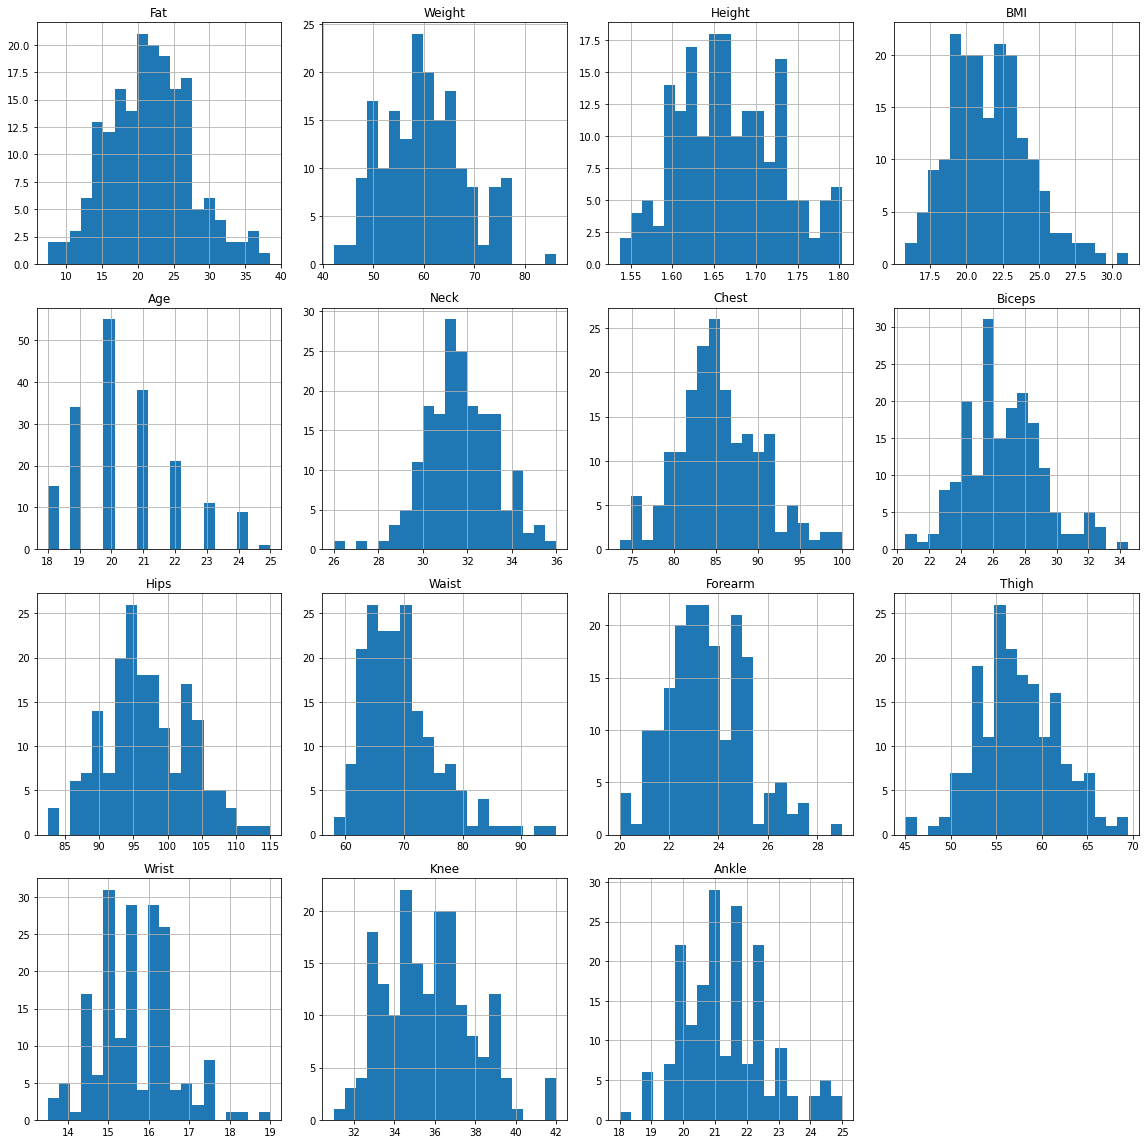

In [42]:
fig, axes = plt.subplots(4,4,figsize=(16,16)) # create figure and axes
for i,e in enumerate((dfFemale.columns.values)):
    a=dfFemale.hist(e,ax=axes.flatten()[i],figsize=(4,4),bins=20)
plt.tight_layout() 
fig.delaxes(axes[3,3]) # remove empty subplot
plt.show()

### ---- Seems like we are good to proceed further----

### 4.8 The correlation among variable

#### 4.8.1 Male Subset

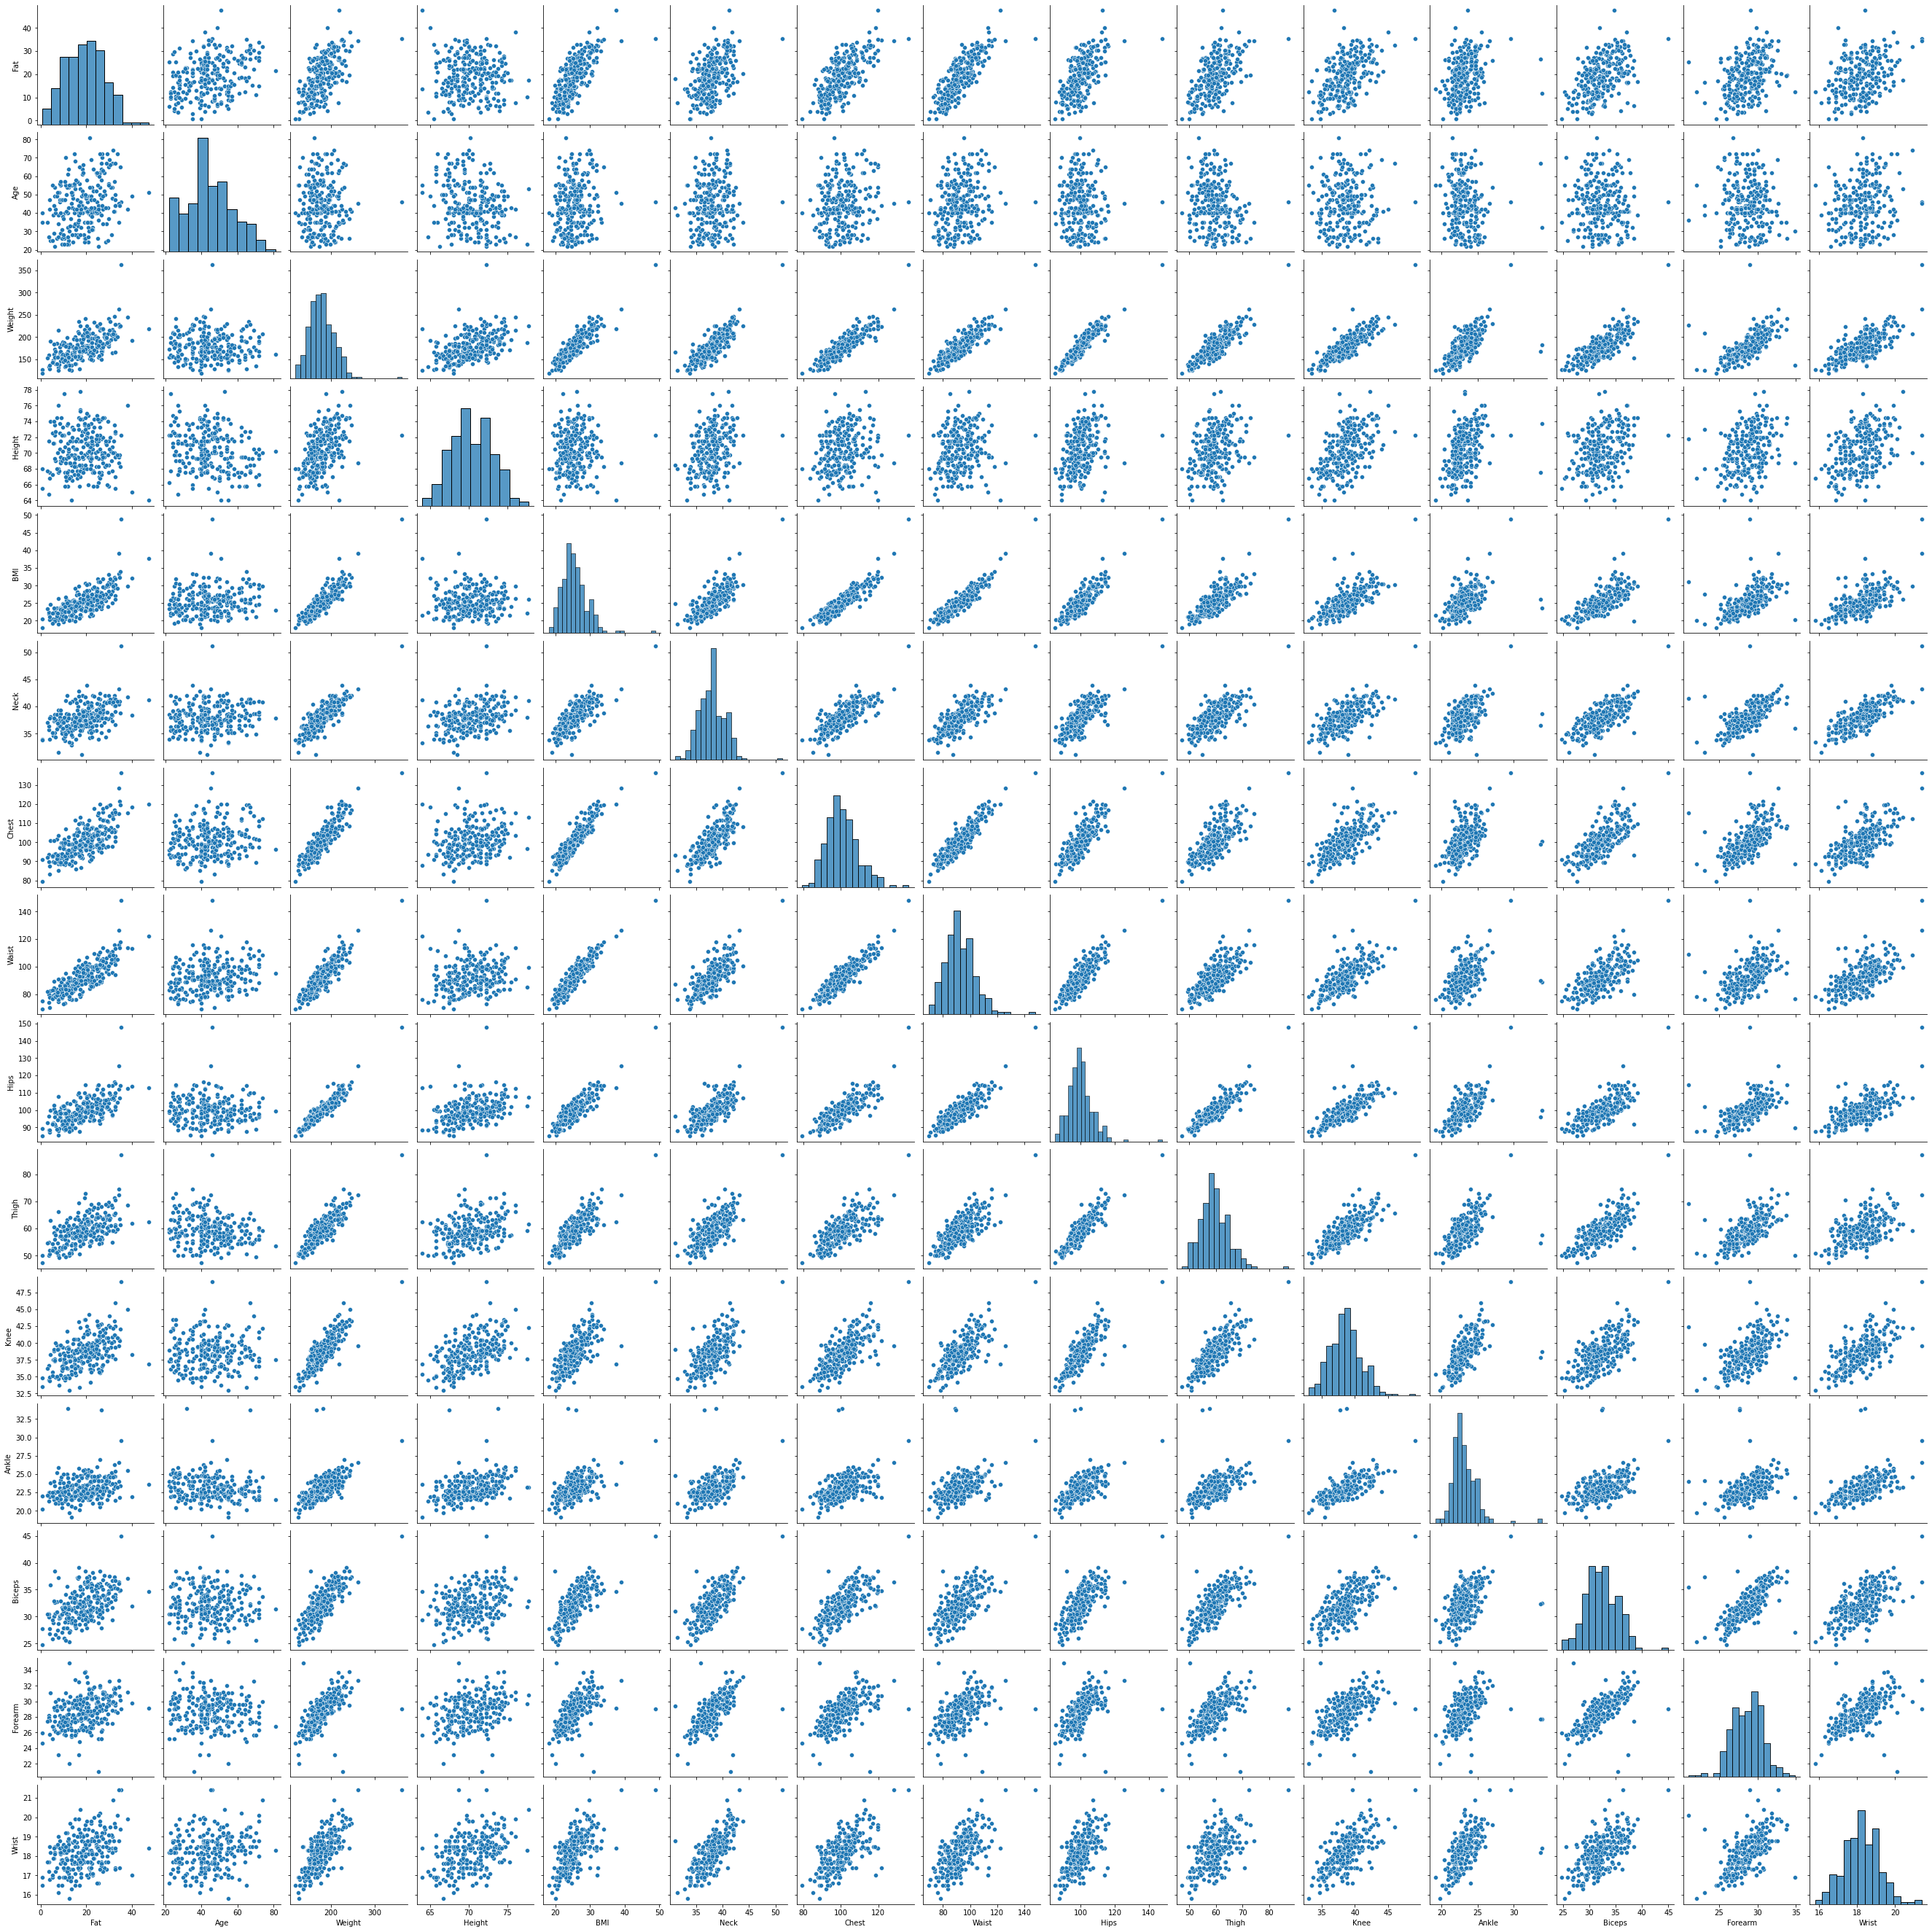

In [43]:
#Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(dfMale);

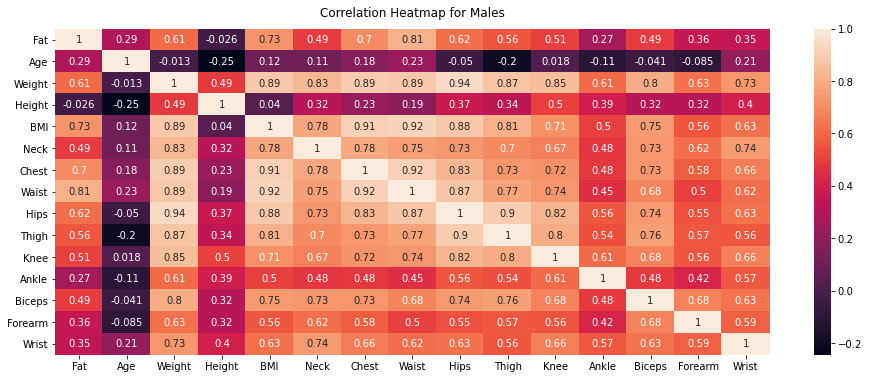

In [44]:
plt.figure(figsize=(16, 6))
heatmap=sns.heatmap(dfMale.corr(),annot = True);
heatmap.set_title('Correlation Heatmap for Males', fontdict={'fontsize':12}, pad=12);

#### 4.8.2 Female Subset

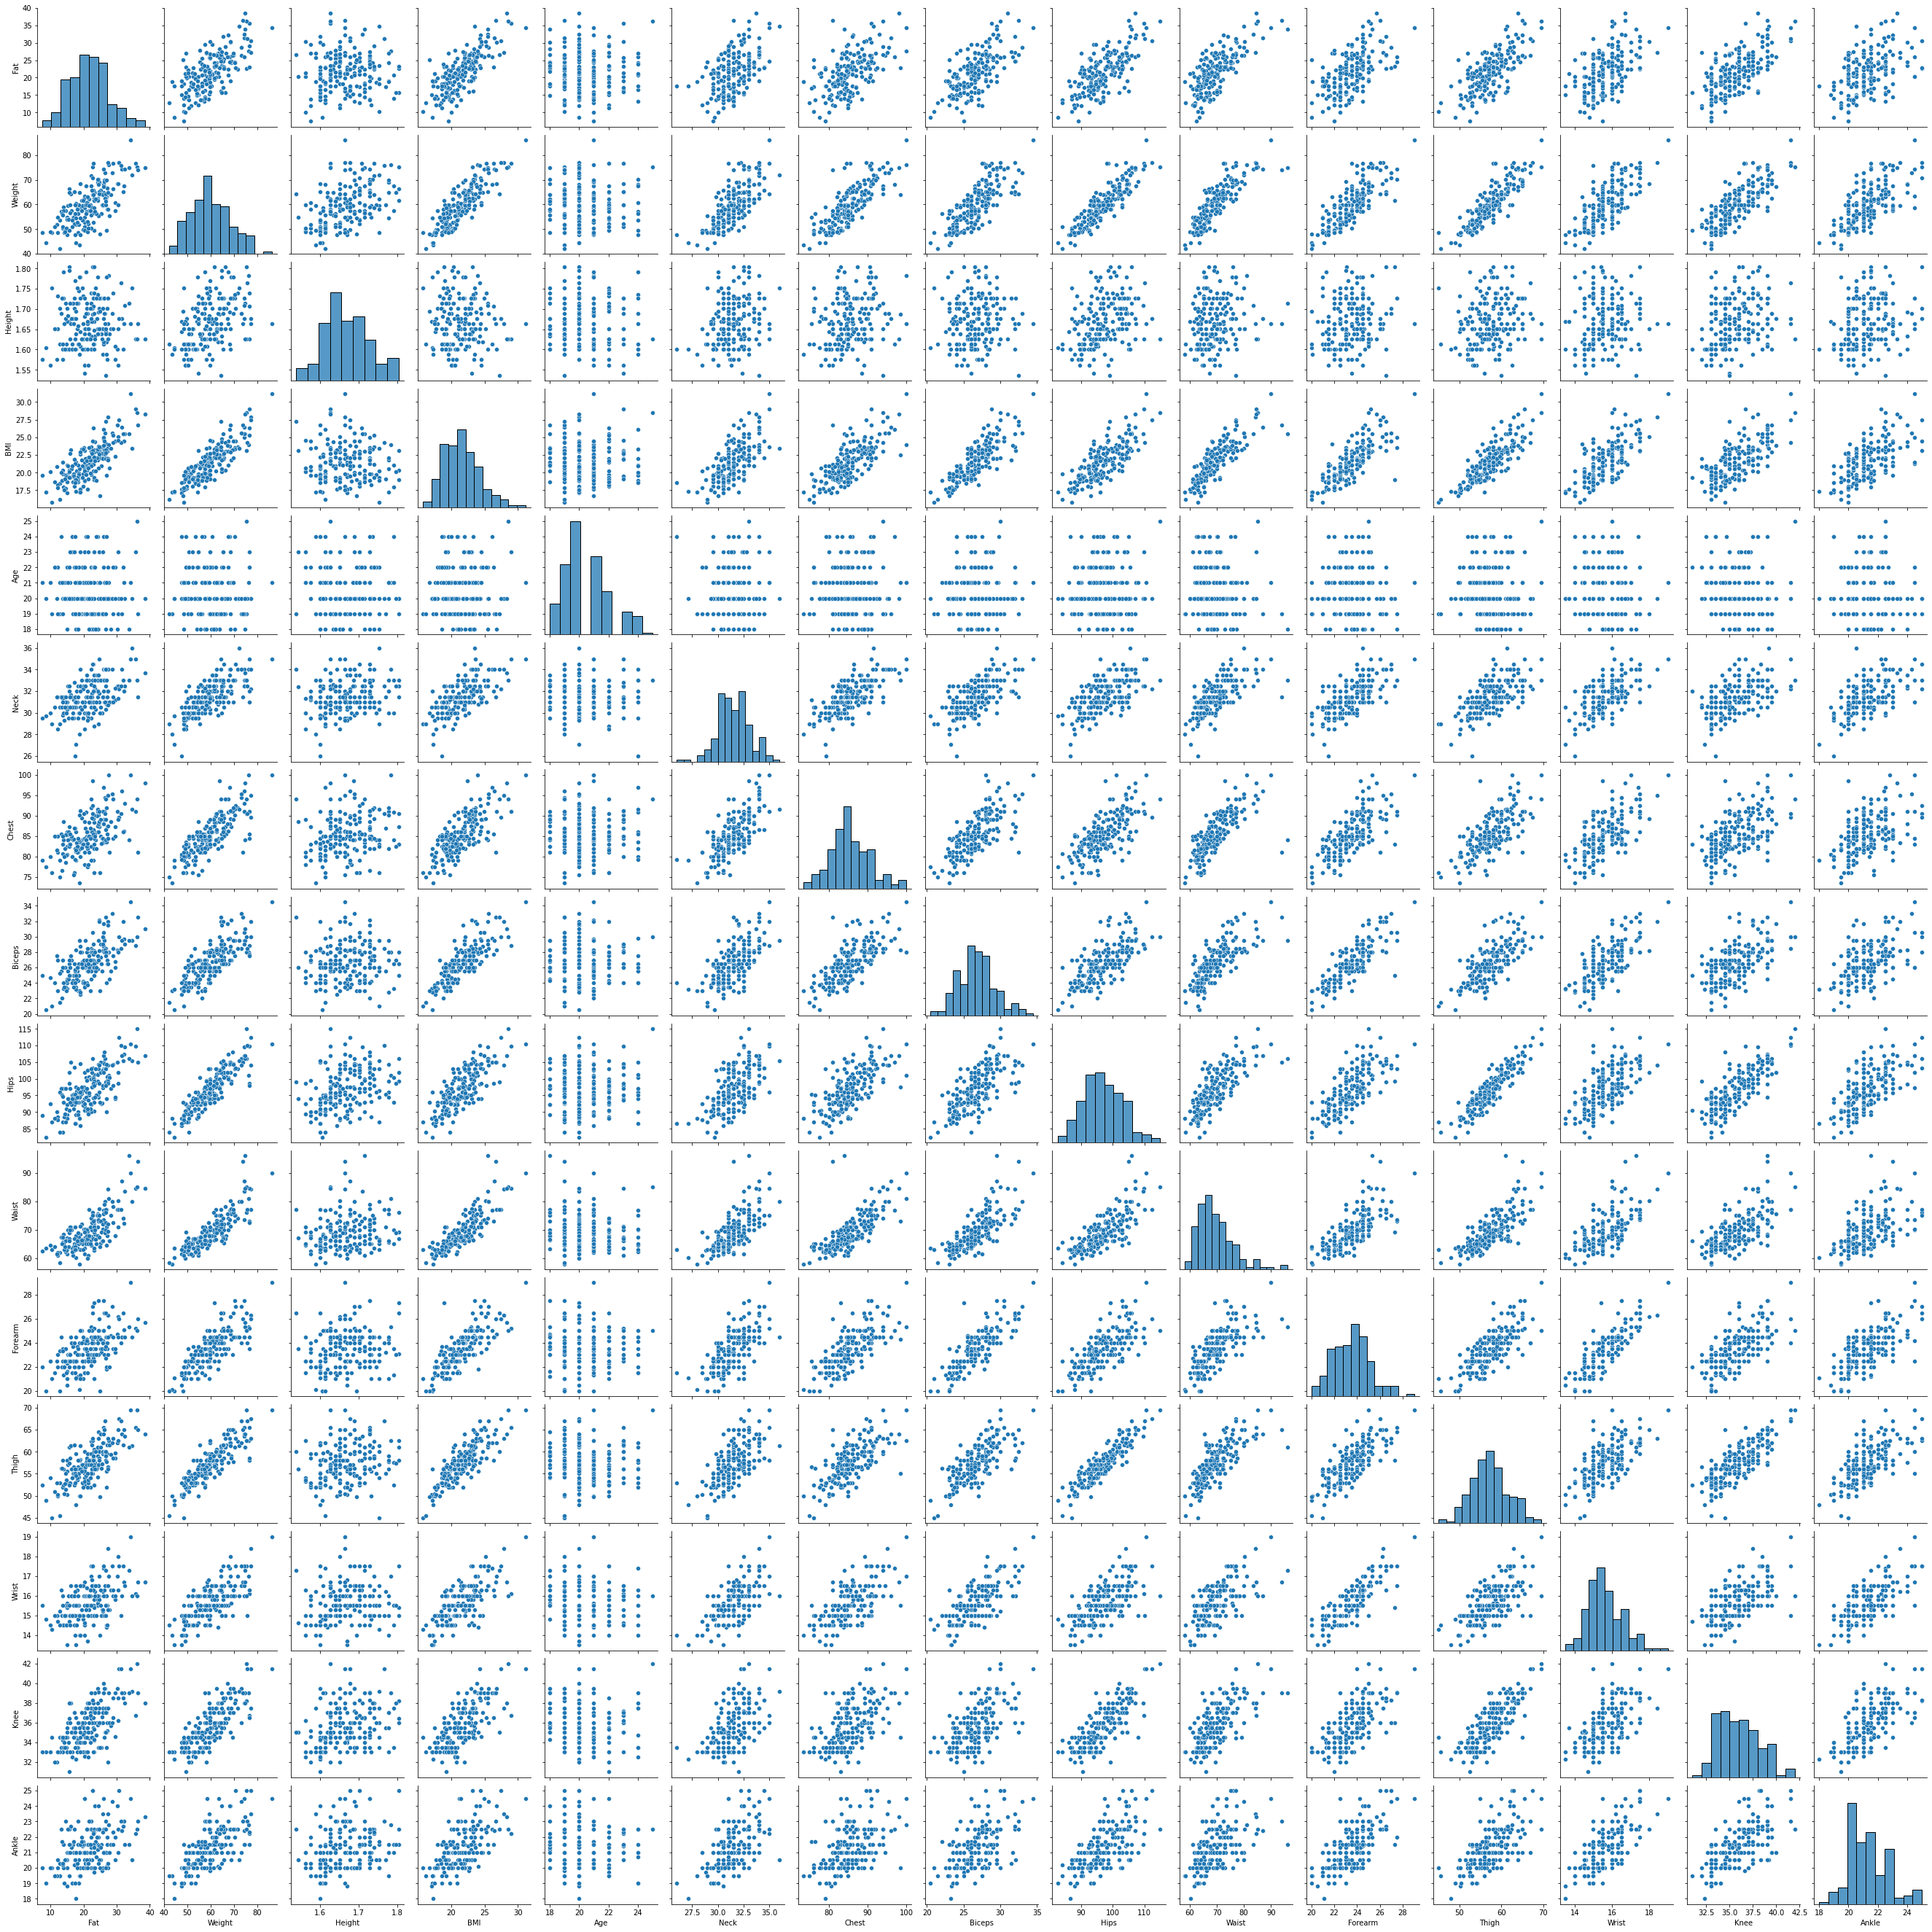

In [45]:
#Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(dfFemale);

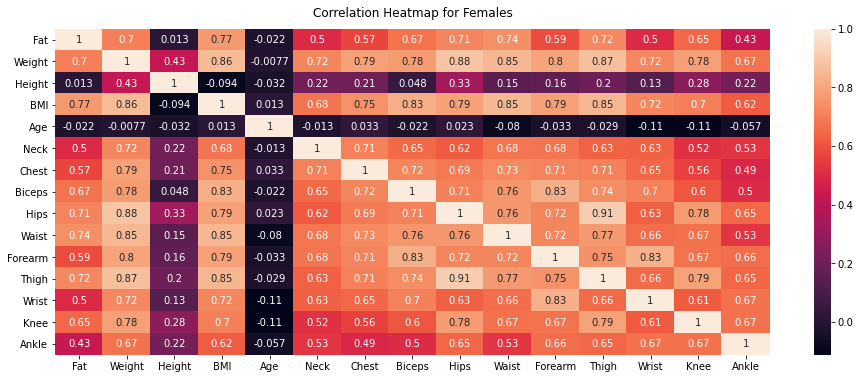

In [46]:
plt.figure(figsize=(16, 6))
heatmap=sns.heatmap(dfFemale.corr(),annot = True);
heatmap.set_title('Correlation Heatmap for Females', fontdict={'fontsize':12}, pad=12);

## <u> Observations

###  - Looks like the relationships are mostly linear

### - However there is a high degree of collinearity which we need to take care of

### - One key thing to note is, while males have higher correlation of bodyfat with waistline and chest, females seem more predisposed to store bodyfat in the mid-lower body secttion

## <u> Implications

### Begin with multiple linear regression model

### Use a stepwise model for variable selection

### Introduce interaction terms between body part measurements and genders

## 5 <u> With these points in mind let us start modelling

### 5.1 Binary hot encoding

In [47]:
dfMale['Gender']=0
dfFemale['Gender']=1

#### Before we go on to create a single dataset let us ensure units are the same

In [48]:
dfMale['Weight']=dfMale['Weight']/2.2
dfMale['Height']=dfMale['Height']*2.54/100

### 5.2 Merging the datasets

In [49]:
df=pd.concat([dfFemale,dfMale],ignore_index=True)
df.drop('BMI',axis=1,inplace=True)

#### 5.2.1 Creating interaction terms

In [50]:
body_measures=[x for x in df.columns[5:-2]]
for col in body_measures:
    df['Gender*'+col]=df['Gender']*df[col]
x_var=[x for x in df.columns[1:]]

#### 5.2.1.1 Checking if operations were performed

In [51]:
df

Fat     Weight   Height   Age       Neck       Chest     Biceps  \
0    23.070000  49.442402  1.61290  22.0  28.799999   76.099998  25.000000   
1    29.500000  60.782398  1.57480  22.0  31.200001   87.300003  26.799999   
2    26.990000  63.050400  1.61798  21.0  30.799999   83.699997  27.799999   
3    20.250000  53.071201  1.68148  20.0  30.000000   78.000000  23.799999   
4    19.950001  59.421600  1.73228  20.0  32.500000   84.199997  24.200001   
..         ...        ...      ...   ...        ...         ...        ...   
431  11.000000  61.022724  1.70180  70.0  34.900002   89.199997  25.600000   
432  33.599998  91.363632  1.77165  72.0  40.900002  108.500000  35.200001   
433  29.299999  84.886360  1.67640  72.0  38.900002  111.099998  31.299999   
434  26.000000  86.704544  1.79070  72.0  38.900002  108.300003  30.500000   
435  31.900000  94.318176  1.77800  74.0  40.799999  112.400002  33.700001   

           Hips       Waist    Forearm  ...      Ankle  Gender  Gender*Chest  \
0     90.199997   62.799999  21.000000  ...  19.700001       1     76.099998   
1     94.000000   68.000000  23.200001  ...  22.000000       1     87.300003   
2     94.000000   71.000000  21.799999  ...  20.100000       1     83.699997   
3     90.500000   63.500000  21.500000  ...  20.000000       1     78.000000   
4     93.199997   65.000000  21.000000  ...  21.000000       1     84.199997   
..          ...         ...        ...  ...        ...     ...           ...   
431   88.800003   83.599998  25.700001  ...  21.500000       0      0.000000   
432  104.500000  105.000000  28.600000  ...  23.200001       0      0.000000   
433  101.699997  111.500000  27.200001  ...  21.500000       0      0.000000   
434   97.800003  101.300003  29.400000  ...  22.700001       0      0.000000   
435  107.099998  108.500000  30.000000  ...  24.600000       0      0.000000   

     Gender*Biceps  Gender*Hips  Gender*Waist  Gender*Forearm  Gender*Thigh  \
0        25.000000    90.199997     62.799999       21.000000          52.5   
1        26.799999    94.000000     68.000000       23.200001          58.5   
2        27.799999    94.000000     71.000000       21.799999          55.5   
3        23.799999    90.500000     63.500000       21.500000          52.5   
4        24.200001    93.199997     65.000000       21.000000          55.5   
..             ...          ...           ...             ...           ...   
431       0.000000     0.000000      0.000000        0.000000           0.0   
432       0.000000     0.000000      0.000000        0.000000           0.0   
433       0.000000     0.000000      0.000000        0.000000           0.0   
434       0.000000     0.000000      0.000000        0.000000           0.0   
435       0.000000     0.000000      0.000000        0.000000           0.0   

     Gender*Wrist  Gender*Knee  
0            15.0    33.000000  
1            15.8    34.599998  
2            14.4    35.000000  
3            14.5    35.000000  
4            14.8    33.000000  
..            ...          ...  
431           0.0     0.000000  
432           0.0     0.000000  
433           0.0     0.000000  
434           0.0     0.000000  
435           0.0     0.000000  

[436 rows x 23 columns]

### At this point we will import some libraries that will help us with the modelling

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

### 5.3 Splitting into train and test data

In [53]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,1:], df['Fat'],test_size=0.3,random_state=0)
print('Train', x_train.shape, y_train.shape)
print('Test', x_test.shape, y_test.shape)

Train (305, 22) (305,)
Test (131, 22) (131,)


#### 5.3.1 Correlation based feature selection

In [54]:
names=pd.DataFrame(x_train.columns)

model = SelectKBest(score_func=f_regression, k='all')
results = model.fit(x_train, y_train)

print (results.scores_)
#print (results.pvalues_)

results_corr_df=pd.DataFrame(results.scores_)
#Concat and name columns
scored=pd.concat([names,results_corr_df], axis=1)
scored.columns = ["Feature", "Score"]
scored.sort_values(by=['Score'],ascending=False).head(10)

[ 32.13105533   7.82038279   0.42194381   3.18294813  27.51129527
  15.59843237 131.97720114  38.82514495   2.34308082 108.15954172
   1.80445059  40.87998398   8.35612575  11.33148573  14.08745153
  17.25663545  15.61389381  18.1315203   14.90456229  16.61886137
  14.02937788  15.22689282]


Feature       Score
6            Hips  131.977201
9           Thigh  108.159542
11           Knee   40.879984
7           Waist   38.825145
0          Weight   32.131055
4           Chest   27.511295
17   Gender*Waist   18.131520
15  Gender*Biceps   17.256635
19   Gender*Thigh   16.618861
16    Gender*Hips   15.613894

#### 5.3.2 Mutual information based feature selection

In [55]:
names=pd.DataFrame(x_train.columns)

model = SelectKBest(score_func=mutual_info_regression, k='all')
results = model.fit(x_train, y_train)

print (results.scores_)
#print (results.pvalues_)

results_info_df=pd.DataFrame(results.scores_)
#Concat and name columns
scored=pd.concat([names,results_info_df], axis=1)
scored.columns = ["Feature", "Score"]
scored.sort_values(by=['Score'],ascending=False).head(10)

[0.12980759 0.         0.05094516 0.10844392 0.13324821 0.19371234
 0.24721138 0.38085231 0.08895315 0.21146309 0.08997455 0.
 0.07741337 0.09361824 0.17279528 0.25944704 0.20859801 0.27181701
 0.15950551 0.23947913 0.10261269 0.1510919 ]


Feature     Score
7            Waist  0.380852
17    Gender*Waist  0.271817
15   Gender*Biceps  0.259447
6             Hips  0.247211
19    Gender*Thigh  0.239479
9            Thigh  0.211463
16     Gender*Hips  0.208598
5           Biceps  0.193712
14    Gender*Chest  0.172795
18  Gender*Forearm  0.159506

#### 5.3.3 Lasso regression based feature selection

In [78]:
# Use L1 penalty
reg = LassoCV(cv=5, normalize = True)

# Set a minimum threshold of 0.25
sfm = SelectFromModel(reg, threshold=0.25, prefit=False, norm_order=1, max_features=8)

sfm.fit(x_train, y_train)

feature_idx = sfm.get_support()
feature_name = x_train.columns[feature_idx]
print(feature_name)

n_features = sfm.transform(x_train).shape[1]
print(n_features)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4299900535206689, tolerance: 1.2942323384272756
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8775857119944703, tolerance: 1.2942323384272756
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.052243044369789, tolerance: 1.2942323384272756
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:52

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.475172942065, tolerance: 1.2875590454526835
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.057404343271628, tolerance: 1.2875590454526835
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.151544012876457, tolerance: 1.2875590454526835
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526:

Index(['Height', 'Waist', 'Forearm', 'Wrist', 'Gender', 'Gender*Biceps',
       'Gender*Waist', 'Gender*Forearm'],
      dtype='object')
8


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.2589236210797, tolerance: 1.3757690587902147
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.699984939966726, tolerance: 1.3757690587902147
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.44202412683171, tolerance: 1.3757690587902147
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526:

### 6. At this point let us revisit the correlation plot for the entire dataframe

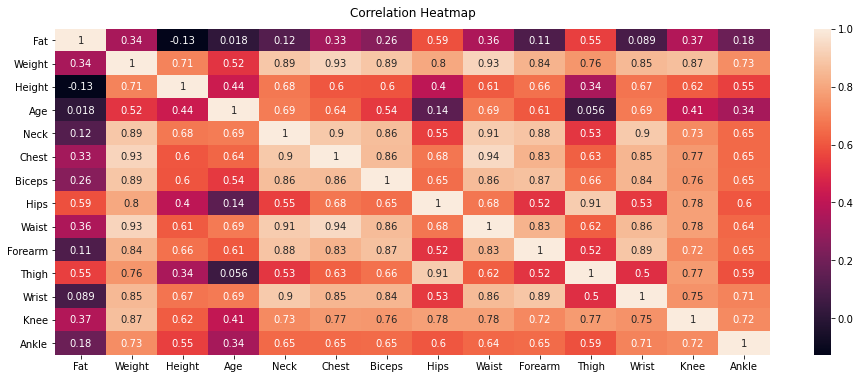

In [79]:
plt.figure(figsize=(16, 6))
heatmap_full=sns.heatmap(df.iloc[:,0:14].corr(),annot = True);
heatmap_full.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

##### And let us learn a linear regression on features selected by Lasso

In [80]:
linear_regressor = LinearRegression()  # create object for the class
X=x_train[feature_name]
model=linear_regressor.fit(X, y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

In [81]:
model.score(X,y_train)

0.6810585690378177

In [82]:
coef=model.coef_

In [83]:
predictors=feature_name

In [84]:
df_model=pd.DataFrame(columns=['Predictors','Coefficient'])
df_model['Predictors']=pd.Series('Intercept')
df_model['Coefficient']=model.intercept_
df1=pd.DataFrame({'Predictors':predictors,'Coefficient':coef})
df2=pd.concat([df_model,df1])

In [85]:
print("Our final Model ->")
display(df2)

Our final Model ->


Predictors  Coefficient
0       Intercept     5.388789
0          Height   -16.360945
1           Waist     0.674098
2         Forearm     0.266537
3           Wrist    -1.487765
4          Gender    -3.357153
5   Gender*Biceps     1.018084
6    Gender*Waist    -0.141319
7  Gender*Forearm    -0.009657

### Why did we chose the one based on lasso rather than the ones thrown by correlation  based and information based selections?
### Because as seen on the correlation heatmap, the features had a high degree of correlation. Luckily for us the ones given to us by Lasso are much less correlated

## 7. Finally let us evaluate on test dataset

In [86]:
print(f'Adjusted R-sq is -> {model.score(x_test[feature_name],y_test)}')

Adjusted R-sq is -> 0.6834378316708029


## Not bad, our model on train and test performs similar wrt to adj R-sq

### Finally let us take a look at what our model intuitively suggests
### Height has a negative impact. Citrus Paribus taller people carry less fat
### Waise has a positive correlation with both males and females but less so for females as the coefficient of Gender*Waist is negative
### Larger forearms imply higher bodyfat for both the genders
### Males on an average are leaner
### Biceps don't have an impact n males but do have an effect on females